# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('movies_complete.csv', parse_dates=['release_date'])

In [4]:
df.head(2)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

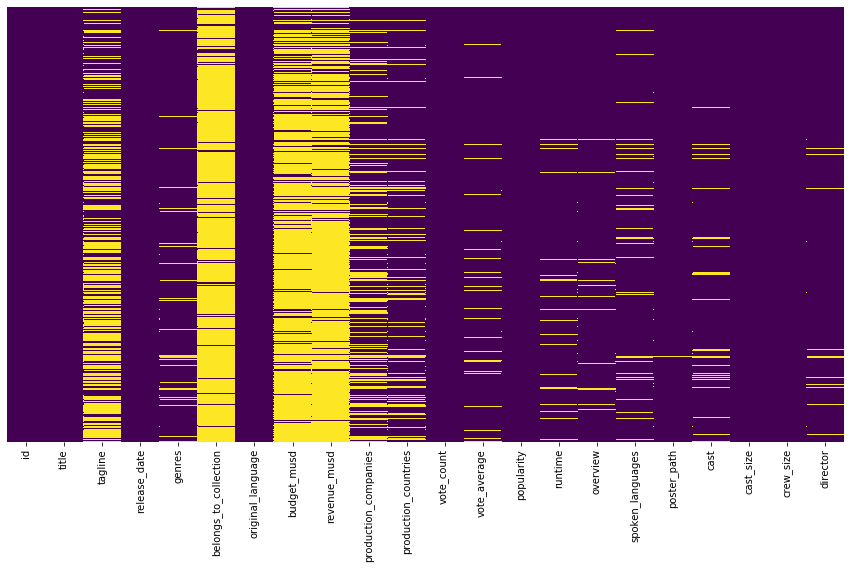

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

__Movies Top 5 - Highest Revenue__

In [7]:
df.sort_values(by='revenue_musd', ascending=False).head(5).title
#revenue_musd

14448                          Avatar
26265    Star Wars: The Force Awakens
1620                          Titanic
17669                    The Avengers
24812                  Jurassic World
Name: title, dtype: object

__Movies Top 5 - Highest Budget__

In [8]:
hb = df.sort_values(by='budget_musd', ascending=False).head(5)
hb[['title', 'budget_musd']]

,title,budget_musd
16986,Pirates of the Caribbean: On Stranger Tides,380.0
11743,Pirates of the Caribbean: At World's End,300.0
26268,Avengers: Age of Ultron,280.0
10985,Superman Returns,270.0
18517,John Carter,260.0


__Movies Top 5 - Highest Profit__

In [9]:
df['profit'] = df['revenue_musd'] - df['budget_musd']

In [10]:
hp = df.sort_values(by='profit', ascending=False).head(5)
hp[['title', 'budget_musd', 'revenue_musd', 'profit']]

,title,budget_musd,revenue_musd,profit
14448,Avatar,237.0,2787.965087,2550.965087
26265,Star Wars: The Force Awakens,245.0,2068.223624,1823.223624
1620,Titanic,200.0,1845.034188,1645.034188
24812,Jurassic World,150.0,1513.528810,1363.528810
28501,Furious 7,190.0,1506.249360,1316.249360


__Movies Top 5 - Lowest Profit__

In [11]:
hp = df.sort_values(by='profit').head(5)
hp[['title','budget_musd', 'revenue_musd', 'profit']]

,title,budget_musd,revenue_musd,profit
20959,The Lone Ranger,255.000000,89.289910,-165.710090
7164,The Alamo,145.000000,25.819961,-119.180039
16659,Mars Needs Moms,150.000000,38.992758,-111.007242
43611,Valerian and the City of a Thousand Planets,197.471676,90.024292,-107.447384
2684,The 13th Warrior,160.000000,61.698899,-98.301101


__Movies Top 5 - Highest ROI__

In [12]:
df['ROI'] = (df['revenue_musd']/df['budget_musd']) * 100

In [13]:
hr = df.sort_values(by='ROI', ascending=False).head(5)
hr[['title', 'ROI', 'budget_musd', 'revenue_musd', 'profit']]

,title,ROI,budget_musd,revenue_musd,profit
3965,Less Than Zero,1.239638e+09,0.000001,12.396383,12.396382
3312,Modern Times,8.500000e+08,0.000001,8.500000,8.499999
14270,Welcome to Dongmakgol,4.197477e+08,0.000008,33.579813,33.579805
22041,Aquí Entre Nos,2.755584e+08,0.000001,2.755584,2.755583
2284,"The Karate Kid, Part II",1.018619e+08,0.000113,115.103979,115.103866


__Movies Top 5 - Lowest ROI__

In [14]:
hr = df.sort_values(by='ROI').head(5)
hr[['title', 'ROI', 'budget_musd', 'revenue_musd', 'profit']]

,title,ROI,budget_musd,revenue_musd,profit
6955,Chasing Liberty,0.000052,23.000000,0.000012,-22.999988
8041,The Cookout,0.000075,16.000000,0.000012,-15.999988
2636,Never Talk to Strangers,0.000094,6.400000,0.000006,-6.399994
12859,To Rob a Thief,0.000150,4.002313,0.000006,-4.002307
17381,Deadfall,0.000180,10.000000,0.000018,-9.999982


__Movies Top 5 - Most Votes__

In [15]:
mw = df.sort_values(by='vote_count', ascending=False).head(5)
mw[['title', 'vote_count']]

,title,vote_count
15368,Inception,14075.0
12396,The Dark Knight,12269.0
14448,Avatar,12114.0
17669,The Avengers,12000.0
26272,Deadpool,11444.0


__Movies Top 5 - Highest Rating__

In [16]:
HR = df.sort_values(by='vote_average', ascending=False).head(5)
HR[['title', 'vote_average', 'vote_count']]

,title,vote_average,vote_count
36996,Portrait of a Young Man in Three Movements,10.0,1.0
33891,Brave Revolutionary,10.0,1.0
1615,Other Voices Other Rooms,10.0,1.0
35505,The Lion of Thebes,10.0,1.0
25882,Katt Williams: Priceless: Afterlife,10.0,2.0


__Movies Top 5 - Lowest Rating__

In [17]:
lw = df.sort_values(by='vote_average').head(5)
lw[['title', 'vote_average', 'vote_count']]

,title,vote_average,vote_count
24522,"Dance, Fools, Dance",0.0,2.0
37762,.hack Liminality: In the Case of Mai Minase,0.0,1.0
26403,Lucrezia Borgia,0.0,2.0
12189,Joe and Max,0.0,1.0
20450,The Substitute,0.0,1.0


__Movies Top 5 - Most Popular__

In [18]:
mp = df.sort_values(by='popularity', ascending=False).head(5)
mp[['title', 'popularity' ]]

,title,popularity
30330,Minions,547.488298
32927,Wonder Woman,294.337037
41556,Beauty and the Beast,287.253654
42940,Baby Driver,228.032744
24187,Big Hero 6,213.849907


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

## Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)

In [19]:
def checkGen(s):
    l = s.split('|')
    if ('Science Fiction' in l) & ('Action' in l):
        return True
    else:
        return False
    
def checkCast(s):               # This Function is replaced by lambda
    l = s.split('|')             
    if ('Bruce Willis' in l):
        return True
    else:
        return False  

In [20]:
df['genres'].fillna('Unknown', inplace=True) # Can't use dropna(), it will reduce the no. of rows, mismatched index with result 
df['cast'].fillna('Unknown', inplace=True)   # Filling NaN values to match the index of returned true and false values

temp = df[(df['genres'].apply(checkGen))].sort_values(by='vote_count', ascending=False)    
# Dataframe with only Sci-fi and action movies)

print('Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)')

# Now we will furthur filter this dataframe with 'cast' have 'Bruce Willis' in it.
temp[ temp['cast'].apply(lambda x: 'Bruce Willis' in x.split('|')) ][['title', 'genres', 'cast', 'vote_count']]

Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)


,title,genres,cast,vote_count
19218,Looper,Action|Thriller|Science Fiction,Joseph Gordon-Levitt|Bruce Willis|Emily Blunt|...,4777.0
1448,The Fifth Element,Adventure|Fantasy|Action|Thriller|Science Fiction,Bruce Willis|Gary Oldman|Ian Holm|Milla Jovovi...,3962.0
20333,G.I. Joe: Retaliation,Adventure|Action|Science Fiction|Thriller,Dwayne Johnson|D.J. Cotrona|Adrianne Palicki|B...,3045.0
1786,Armageddon,Action|Thriller|Science Fiction|Adventure,Bruce Willis|Billy Bob Thornton|Ben Affleck|Li...,2540.0
14135,Surrogates,Action|Science Fiction|Thriller,Bruce Willis|Radha Mitchell|Rosamund Pike|Jame...,1219.0
27619,Vice,Thriller|Science Fiction|Action|Adventure,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,245.0


## Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)

In [21]:
umaAll = df[ df['cast'].apply(lambda x: 'Uma Thurman' in x.split('|')) ].sort_values(by='runtime')

In [22]:
umaAndQuentin = umaAll[ umaAll['director'] == 'Quentin Tarantino' ]

In [23]:
umaAndQuentin[['title', 'cast', 'director']]

,title,cast,director
6667,Kill Bill: Vol. 1,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino
7208,Kill Bill: Vol. 2,Uma Thurman|David Carradine|Daryl Hannah|Micha...,Quentin Tarantino
291,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino


In [24]:
umaAll[ umaAll['director'].apply(lambda x: 'Quentin Tarantino' in x) ][['title', 'cast', 'director']]

,title,cast,director
6667,Kill Bill: Vol. 1,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino
7208,Kill Bill: Vol. 2,Uma Thurman|David Carradine|Daryl Hannah|Micha...,Quentin Tarantino
291,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino


## Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)

In [25]:
df['release_year'] = df['release_date'].dt.year

In [26]:
pixarAll = df[ df['production_companies'] == 'Pixar Animation Studios' ] # Use str.contains() at here.

pixar2010to2015 = pixarAll[ pixarAll['release_year'].apply(lambda x: x>=2010.0 and x<=2015.0) ]

#pixar2010to2015.sort_values(by='revenue_musd', ascending=False)[['title', 'release_date', 'revenue_musd']]

pixarAll[['title', 'release_date', 'revenue_musd']]

,title,release_date,revenue_musd
0,Toy Story,1995-10-30,373.554033
2969,Toy Story 2,1999-10-30,497.366869
6179,Finding Nemo,2003-05-30,940.335536
10581,Luxo Jr.,1986-08-17,NaN
13630,Up,2009-05-13,735.099082
14309,Partly Cloudy,2009-05-28,NaN
16739,BURN·E,2008-11-17,NaN
18020,Lifted,2006-12-28,NaN
18930,Presto,2008-06-18,NaN
18935,One Man Band,2005-06-21,NaN


In [27]:
pixar2010to2015.sort_values(by='revenue_musd', ascending=False)[['title', 'release_date', 'revenue_musd']]

,title,release_date,revenue_musd
21694,The Blue Umbrella,2013-02-12,NaN
22489,La luna,2011-01-01,NaN
24252,Hawaiian Vacation,2011-06-16,NaN
24254,Small Fry,2011-11-23,NaN
25516,The Legend of Mor'du,2012-01-01,NaN
25517,Toy Story That Time Forgot,2014-12-02,NaN
31803,Lava,2015-06-21,NaN
34560,Sanjay's Super Team,2015-11-25,NaN
40259,Air Mater,2011-08-04,NaN


## Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)

In [28]:
Act_thrill_all = df[ df['genres'].apply(lambda x: ('Thriller' in x.split('|')) & ('Action' in x.split('|'))) ]

In [29]:
Ac_Th_en_75 = Act_thrill_all[ (Act_thrill_all['original_language'] == 'en') & (Act_thrill_all['vote_average'] >= 7.5) ]

In [30]:
Ac_Th_en_75.sort_values(by='release_date', ascending=False)[['title', 'genres', 'original_language', 'vote_average', 'release_date']]

,title,genres,original_language,vote_average,release_date
43941,Dunkirk,Action|Drama|History|Thriller|War,en,7.5,2017-07-19
21565,Captain Phillips,Action|Drama|Thriller,en,7.6,2013-10-10
18090,The Dark Knight Rises,Action|Crime|Drama|Thriller,en,7.6,2012-07-16
43449,Ghost Recon: Alpha,Action|Science Fiction|Thriller|War,en,7.5,2012-05-03
22381,Oxy-Morons,Action|Thriller,en,8.0,2011-10-02
15368,Inception,Action|Thriller|Science Fiction|Mystery|Adventure,en,8.1,2010-07-14
13515,Inglourious Basterds,Drama|Action|Thriller|War,en,7.9,2009-08-18
13755,Prison Break: The Final Break,Action|Drama|Thriller,en,7.5,2009-05-26
12396,The Dark Knight,Drama|Action|Crime|Thriller,en,8.3,2008-07-16
44145,I Am So Proud of You,Animation|Action|Thriller|Science Fiction,en,8.3,2008-01-01


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

__Franchise vs. Stand-alone: Average Revenue__

In [31]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit', 'ROI', 'release_year'],
      dtype='object')

In [32]:
df[['title', 'belongs_to_collection', 'revenue_musd', 'budget_musd', 'popularity', 'vote_average' ]].head(30)

,title,belongs_to_collection,revenue_musd,budget_musd,popularity,vote_average
0,Toy Story,Toy Story Collection,373.554033,30.00,21.946943,7.7
1,Jumanji,NaN,262.797249,65.00,17.015539,6.9
2,Grumpier Old Men,Grumpy Old Men Collection,NaN,NaN,11.712900,6.5
3,Waiting to Exhale,NaN,81.452156,16.00,3.859495,6.1
4,Father of the Bride Part II,Father of the Bride Collection,76.578911,NaN,8.387519,5.7
5,Heat,NaN,187.436818,60.00,17.924927,7.7
6,Sabrina,NaN,NaN,58.00,6.677277,6.2
7,Tom and Huck,NaN,NaN,NaN,2.561161,5.4
8,Sudden Death,NaN,64.350171,35.00,5.231580,5.5
9,GoldenEye,James Bond Collection,352.194034,58.00,14.686036,6.6


In [33]:
franchise = df[ (df['belongs_to_collection'].notna()) ]

In [34]:
franchise[['title', 'belongs_to_collection', 'revenue_musd', 'budget_musd', 'popularity', 'vote_average', 'ROI' ]]

,title,belongs_to_collection,revenue_musd,budget_musd,popularity,vote_average,ROI
0,Toy Story,Toy Story Collection,373.554033,30.0,21.946943,7.7,1245.180110
2,Grumpier Old Men,Grumpy Old Men Collection,NaN,NaN,11.712900,6.5,NaN
4,Father of the Bride Part II,Father of the Bride Collection,76.578911,NaN,8.387519,5.7,NaN
9,GoldenEye,James Bond Collection,352.194034,58.0,14.686036,6.6,607.231093
12,Balto,Balto Collection,11.348324,NaN,12.140733,7.1,NaN
...,...,...,...,...,...,...,...
44582,Carry On Follow That Camel,The Carry On Collection,NaN,NaN,1.114848,6.1,NaN
44585,Carry On Camping,The Carry On Collection,NaN,NaN,4.103723,6.5,NaN
44596,Carry On England,The Carry On Collection,NaN,NaN,0.846154,4.8,NaN
44598,LEGO DC Super Hero Girls: Brain Drain,DC Super Hero Girls Collection,NaN,NaN,8.413734,10.0,NaN


In [35]:
stand_alone = df[ df['belongs_to_collection'].isnull() ] 

In [36]:
stand_alone[['title', 'belongs_to_collection', 'revenue_musd', 'budget_musd', 'popularity', 'vote_average', 'ROI' ]]

,title,belongs_to_collection,revenue_musd,budget_musd,popularity,vote_average,ROI
1,Jumanji,NaN,262.797249,65.0,17.015539,6.9,404.303460
3,Waiting to Exhale,NaN,81.452156,16.0,3.859495,6.1,509.075975
5,Heat,NaN,187.436818,60.0,17.924927,7.7,312.394697
6,Sabrina,NaN,NaN,58.0,6.677277,6.2,NaN
7,Tom and Huck,NaN,NaN,NaN,2.561161,5.4,NaN
...,...,...,...,...,...,...,...
44686,Subdue,NaN,NaN,NaN,0.072051,4.0,NaN
44687,Century of Birthing,NaN,NaN,NaN,0.178241,9.0,NaN
44688,Betrayal,NaN,NaN,NaN,0.903007,3.8,NaN
44689,Satan Triumphant,NaN,NaN,NaN,0.003503,NaN,NaN


In [37]:
print('Franchise Avrg revenue')

franchise['revenue_musd'].mean()

Franchise Avrg revenue


165.70819260175796

In [38]:
print('stand_alone Avrg revenue')

stand_alone['revenue_musd'].mean()

stand_alone Avrg revenue


44.7428140060954

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [39]:
print('Franchise Avrg ROI')

franchise['ROI'].mean()

Franchise Avrg ROI


85640.46224739222

In [40]:
print('stand_alone Avrg ROI')

stand_alone['ROI'].mean()

stand_alone Avrg ROI


696639.0650203911

__Franchise vs. Stand-alone: Average Budget__

In [41]:
print('Franchise Avrg budget_musd')

franchise['budget_musd'].mean()

Franchise Avrg budget_musd


38.31984712958281

In [42]:
print('stand_alone Avrg budget_musd')

stand_alone['budget_musd'].mean()

stand_alone Avrg budget_musd


18.047741174779947

__Franchise vs. Stand-alone: Average Popularity__

In [43]:
print('Franchise Avrg popularity')

franchise['popularity'].mean()

Franchise Avrg popularity


6.245051188662314

In [44]:
print('stand_alone Avrg popularity')

stand_alone['popularity'].mean()

stand_alone Avrg popularity


2.592726062543528

__Franchise vs. Stand-alone: Average Rating__

In [45]:
print('Franchise Avrg vote_average')

franchise['vote_average'].mean()

Franchise Avrg vote_average


5.956805807622486

In [46]:
print('stand_alone Avrg vote_average')

stand_alone['vote_average'].mean()

stand_alone Avrg vote_average


6.008787066287642

## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [47]:
franchise.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit', 'ROI', 'release_year'],
      dtype='object')

In [48]:
franchise['belongs_to_collection'].value_counts().head(5)

The Bowery Boys                  29
Totò Collection                  27
James Bond Collection            26
Zatôichi: The Blind Swordsman    26
The Carry On Collection          25
Name: belongs_to_collection, dtype: int64

In [49]:
franchise.groupby('belongs_to_collection').mean()[['id', 'budget_musd', 'runtime', 'revenue_musd']].sort_values(by='budget_musd', ascending=False).head(30)

,id,budget_musd,runtime,revenue_musd
belongs_to_collection,,,,
Tangled Collection,60819.000000,260.000000,53.000000,591.794936
The Avengers Collection,62144.500000,250.000000,142.000000,1462.480802
Pirates of the Caribbean Collection,33731.200000,250.000000,145.600000,904.315365
The Hobbit Collection,76375.333333,250.000000,158.000000,978.507785
Man of Steel Collection,129316.500000,237.500000,147.000000,768.052856
Avatar Collection,19995.000000,237.000000,162.000000,2787.965087
The Amazing Spider-Man Collection,52156.000000,207.500000,139.000000,728.966645
World War Z Collection,72190.000000,200.000000,116.000000,531.865000
Spider-Man Collection,558.000000,199.000000,129.000000,832.115506


## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [50]:
df['director'].value_counts().head(5)

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
Name: director, dtype: int64

In [57]:
df.groupby('director').sum().sort_values(by='revenue_musd', ascending=False).head(10)

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size,profit,ROI,release_year
director,,,,,,,,,,,,
Steven Spielberg,1263357,1736.950000,9256.621422,62266.0,227.5,429.592834,4276.0,1072,1624,7520.121422,30999.808649,65759.0
Peter Jackson,268469,1326.775710,6528.244659,47571.0,92.8,244.855882,1853.0,312,518,5202.244659,5050.507880,26017.0
Michael Bay,941840,1670.000000,6437.466781,28767.0,83.1,166.167558,1907.0,612,850,4767.466781,5089.889330,26085.0
James Cameron,206262,760.045786,5900.610310,33736.0,76.2,308.785370,1253.0,383,579,5140.710310,5423.441585,21935.0
David Yates,1017165,1135.000000,5334.563196,31056.0,60.3,179.892702,1293.0,563,180,4199.563196,3102.206403,18078.0
Christopher Nolan,665524,1105.006000,4747.408665,67344.0,83.8,317.350575,1314.0,631,928,3642.402665,4442.255889,22069.0
Robert Zemeckis,1015066,1165.700000,4138.233542,37666.0,129.1,260.357051,2141.0,665,990,2975.233542,8721.900135,37912.0
Tim Burton,688494,1264.176000,4032.916124,36922.0,141.4,283.272769,2039.0,517,803,2769.916124,6121.790077,41966.0
Ridley Scott,892772,1641.900000,3917.529240,43083.0,158.5,436.913795,3084.0,726,1430,2276.529240,5387.598968,47987.0


In [54]:
df.groupby('director').mean().sort_values(by='vote_count', ascending=False).head(10)

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size,profit,ROI,release_year
director,,,,,,,,,,,,
Tim Miller,293660.000000,58.0000,783.112979,11444.000000,7.400000,187.860492,108.000000,46.000000,88.000000,725.112979,1350.194791,2016.000000
Christopher Nolan,60502.181818,110.5006,474.740866,6122.181818,7.618182,28.850052,119.454545,57.363636,84.363636,364.240267,444.225589,2006.272727
Pierre Coffin,56904.000000,72.5000,757.137935,5662.000000,7.050000,23.549026,96.500000,36.000000,28.000000,684.637935,1032.509849,2011.500000
Pete Docter,44804.000000,155.0000,718.508837,5019.000000,7.525000,19.138145,71.500000,34.000000,97.750000,563.508837,466.508529,2006.750000
Alex Garland,264660.000000,15.0000,36.869414,4862.000000,7.600000,14.140780,108.000000,11.000000,60.000000,21.869414,245.796093,2015.000000
Andrew Stanton,46900.500000,183.5000,693.589346,4808.500000,7.075000,17.683547,106.750000,28.750000,81.750000,510.089346,478.386092,2009.750000
Lee Unkrich,10193.000000,200.0000,1066.969703,4710.000000,7.600000,16.966470,103.000000,45.000000,38.000000,866.969703,533.484851,2010.000000
Rich Moore,82690.000000,165.0000,471.222889,4656.000000,7.100000,13.697597,108.000000,66.000000,38.000000,306.222889,285.589630,2012.000000
Lana Wachowski,4953.000000,33.7500,235.264350,4641.000000,7.400000,22.907953,122.000000,25.000000,43.000000,201.514350,445.774461,1997.500000


In [55]:
# Above method is still good. We have applied 2 conditions vote_count.mean() and vote_ave.mean() both should be highest.
# Which will give us a good idea about Director's rating.

In [56]:
# Now we will add one more condition, that director has atleast 10 movies. 

In [64]:
director = df.groupby('director').agg({"title":'count', "vote_count":'mean', "vote_average":'mean'})

In [67]:
director[ (director['title'] >=10) & (director['vote_count'] >= 1000) ].nlargest(20, 'vote_average')

,title,vote_count,vote_average
director,,,
Hayao Miyazaki,14,1050.000000,7.700000
Christopher Nolan,11,6122.181818,7.618182
Quentin Tarantino,10,4591.000000,7.490000
Wes Anderson,10,1174.300000,7.370000
David Fincher,10,3758.800000,7.350000
Peter Jackson,13,3659.307692,7.138462
Joel Coen,17,1067.000000,7.023529
James Cameron,11,3066.909091,6.927273
Stanley Kubrick,16,1138.375000,6.912500


### Most Successful Directors: Horror

In [68]:
# df.genres has NaN values. We will handle them by converting all column values as str type.
df['genres'] = df.genres.astype(str)

In [72]:
df [ df['genres'].str.contains('Horror') ].groupby('director').revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Henry Joost            349.073570
David R. Ellis         348.742016
Adrian Lyne            346.110837
James DeMonaco         316.699354
Stephen Sommers        311.460501
Gore Verbinski         275.908490
Guillermo del Toro     261.629364
John R. Leonetti       255.273813
Fede Alvarez           254.643797
Jordan Peele           252.434250
Name: revenue_musd, dtype: float64

# Well Done!!!!